In [1]:
from IPython.display import display

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("notebook", font_scale=1)
matplotlib.style.use('ggplot')
%matplotlib inline 


from sklearn import linear_model


import warnings
warnings.filterwarnings('ignore')

/Users/bmigliozzi/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [212]:
raw = pd.read_csv('pSB1C3_qPCR.csv')
raw['dna_lg'] = raw['dna'].apply(np.log) 

raw = raw[raw['set']==1]
df_train = raw[raw['sample']!='Test']
y_train, X_train = df_train['dna_lg'], df_train.drop(['dna_lg','dna','sample','set'], axis=1)

df_test = raw[raw['sample']=='Test']
y_test, X_test = df_test['dna_lg'], df_test.drop(['dna_lg','dna','sample','set'], axis=1)


In [213]:
display(df_train)
display(df_test)

,sample,set,dna,ct,dna_lg
0,Std2,1,100000,21.12,11.512925
1,Std2,1,100000,21.05,11.512925
2,Std2,1,100000,21.15,11.512925
3,Std1,1,1000000,17.76,13.815511
4,Std1,1,1000000,17.81,13.815511
5,Std1,1,1000000,17.07,13.815511
6,Std0,1,10000000,15.41,16.118096
7,Std0,1,10000000,15.18,16.118096
8,Std0,1,10000000,15.45,16.118096


,sample,set,dna,ct,dna_lg
9,Test,1,NaN,17.51,NaN
10,Test,1,NaN,16.72,NaN
11,Test,1,NaN,17.69,NaN


In [214]:
lr = linear_model.LinearRegression()  
lr.fit(X_train, y_train)

display(lr.predict(X_test))
display(lr.coef_)
display(lr.intercept_)

array([ 14.19718767,  14.81254464,  14.05697975])

array([-0.77893288])

27.836302385157715

In [215]:
display(df_train)
df_test['dna_lg'] = lr.predict(X_test)
df_test['dna'] = np.exp(lr.predict(X_test))

df_test

,sample,set,dna,ct,dna_lg
0,Std2,1,100000,21.12,11.512925
1,Std2,1,100000,21.05,11.512925
2,Std2,1,100000,21.15,11.512925
3,Std1,1,1000000,17.76,13.815511
4,Std1,1,1000000,17.81,13.815511
5,Std1,1,1000000,17.07,13.815511
6,Std0,1,10000000,15.41,16.118096
7,Std0,1,10000000,15.18,16.118096
8,Std0,1,10000000,15.45,16.118096


,sample,set,dna,ct,dna_lg
9,Test,1,1464739.060422,17.51,14.197188
10,Test,1,2710231.581014,16.72,14.812545
11,Test,1,1273118.232825,17.69,14.056980


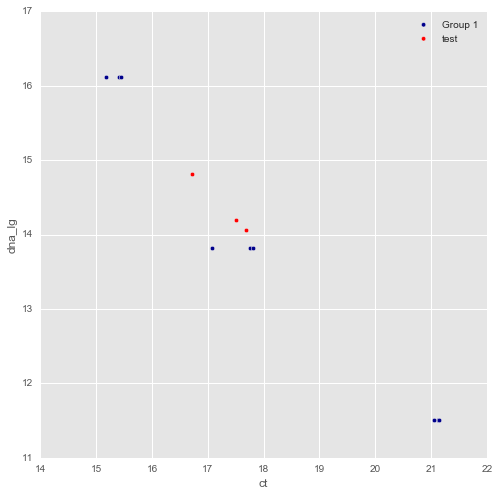

In [216]:
plt.figure()
ax = df_train.plot.scatter(x='ct', y='dna_lg', color='DarkBlue', label='Group 1', figsize=(8,8));
ax = df_test.plot.scatter(x='ct', y='dna_lg', color='red', label='test', figsize=(8,8),ax=ax);
# plt.plot(np.array(X_test), lr.predict(X_test), color='red', linewidth=3)


In [52]:
raw = pd.read_csv('pSB1C3_qPCR.csv')
raw['Log Copy Number'] = raw['dna'].apply(np.log) 
raw['Cycle Threshold'] = raw['ct']
raw = raw.drop(['ct'], axis=1)
df_train = raw[raw['sample']!='Test']
df_test = raw[raw['sample']=='Test']

1
('Coefficients:', array([-0.77893288]))
('Residues:', 0.81868505973276695)
('R Square:', 0.97426440359429145)


,x,regression
0,14.18,16.791034
1,22.15,10.582939


2
('Coefficients:', array([-0.62612552]))
('Residues:', 0.28125047966945776)
('R Square:', 0.99115881162403563)


,x,regression
0,15.83,17.136759
1,25.82,10.881765


3
('Coefficients:', array([-0.6224484]))
('Residues:', 1.6130133294018774)
('R Square:', 0.94929446977319309)


,x,regression
0,15.52,17.420870
1,26.01,10.891386


4
('Coefficients:', array([-0.56717413]))
('Residues:', 0.31862816461218901)
('R Square:', 0.97119324566966359)


,x,regression
0,20.07,14.601039
1,26.95,10.698881


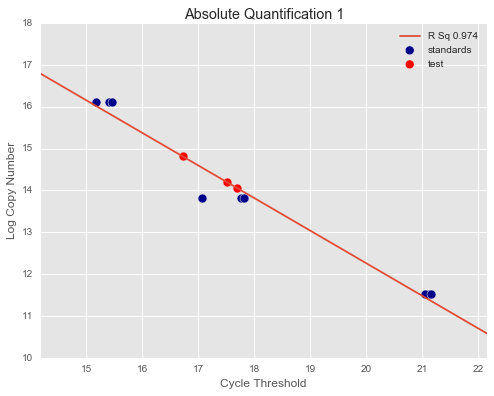

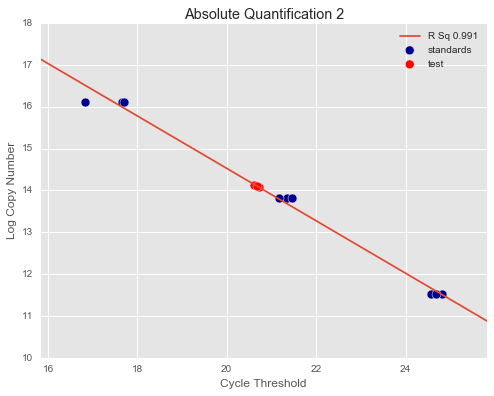

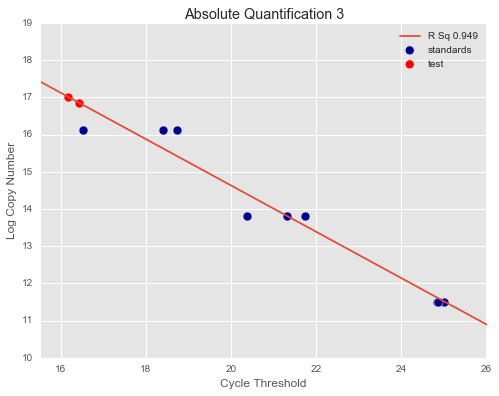

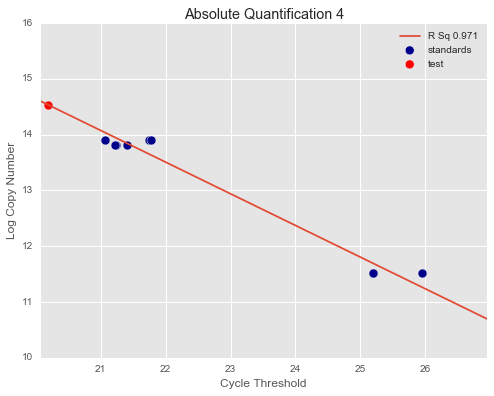

In [58]:
dataframes = []

for i in np.arange(1,5):
    print(i)
    df_train_cur = df_train[df_train['set']==i]
    y_train_cur, X_train_cur = df_train_cur['Log Copy Number'], df_train_cur.drop(['Log Copy Number','dna','sample','set'], axis=1)
    df_test_cur = df_test[df_test['set']==i]
    y_test_cur, X_test_cur = df_test_cur['Log Copy Number'], df_test_cur.drop(['Log Copy Number','dna','sample','set'], axis=1)

    lr = linear_model.LinearRegression()  
    lr.fit(X_train_cur, y_train_cur)
    
    # The coefficients
    print('Coefficients:', lr.coef_)
    
    # The Residues
    print('Residues:', lr.residues_)
    

    # R Square
    rSq = lr.score(X_train_cur, y_train_cur)
    print('R Square:', rSq)
        
    df_test_cur['Log Copy Number'] = lr.predict(X_test_cur)
    df_test_cur['dna'] = np.exp(lr.predict(X_test_cur))
    df_comb = pd.concat([df_train_cur, df_test_cur])
    df_comb['r2'] = lr.score(X_train_cur, y_train_cur)
    dataframes.append(df_comb)
    df_comb.to_csv(str(i)+'_set.csv')
    
    minVal = np.min(df_train_cur['Cycle Threshold'])
    maxVal = np.max(df_train_cur['Cycle Threshold'])
    line_df = pd.DataFrame([minVal-1,maxVal+1],columns=['x'] )
    line_df['regression'] = lr.predict(line_df)
    display(line_df)
    
    plt.figure();    
    ax = line_df.plot(x='x',y='regression',kind='line',label='R Sq '+str(rSq)[:5],title='Absolute Quantification '+str(i));
    ax = df_train_cur.plot.scatter(x='Cycle Threshold', y='Log Copy Number',s=80, color='DarkBlue', label='standards', figsize=(8,6),ax=ax);
    ax = df_test_cur.plot.scatter(x='Cycle Threshold', y='Log Copy Number',s=80, color='red', label='test', figsize=(8,6),ax=ax);
    